In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import VarianceThreshold

In [2]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import torch.optim.lr_scheduler as lr_scheduler
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [3]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import time
import seaborn as sns

In [4]:
import shap

## Load dataset

In [5]:
path_out = r'F:\Codes\joint attention\Nano-particle\output_new_new'

file_path_features_norm = os.path.join(path_out , 'features_normalized_35.npy')
file_path_labels = os.path.join(path_out , 'label_r_avg_raw.npy')
file_path_features_original = os.path.join(path_out , 'features_raw_35.npy')

with open( file_path_features_original , 'rb') as f:
    features_orig = np.load(f)
with open( file_path_labels , 'rb') as f:
    labels = np.load(f)
with open( file_path_features_norm , 'rb') as f:
    features_norm = np.load(f)

print(features_orig.shape)
print(labels.shape)
print(features_norm.shape)

(3999, 35)
(3999, 1)
(3999, 35)


In [6]:
df_original = pd.DataFrame(features_orig, columns=[ f'feature_{i}' for i in range(35)])
df_norm = pd.DataFrame(features_norm, columns=[ f'feature_{i}' for i in range(35)])

In [7]:
df_original.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34
0,273.0,0.000025,1.0,2.710000e-26,0.0,81.0,119.0,0.0,105.0,229.0,...,8936.0,95.5363,34.169839,24.0,23.0,2.0,8.0,2.5153,2.7535,2.1026
1,273.0,0.000025,2.0,2.780000e-26,0.0,65.0,81.0,1.0,111.0,213.0,...,9090.0,95.5073,34.245992,30.0,35.0,1.0,7.0,2.5335,2.9188,1.8783
2,273.0,0.000025,3.0,7.850000e-26,4.0,204.0,168.0,24.0,306.0,304.0,...,26399.0,96.0506,34.609982,700.0,376.0,0.0,17.0,7.3030,8.4074,4.3813
3,273.0,0.000025,4.0,1.220000e-25,8.0,178.0,246.0,46.0,383.0,282.0,...,40689.0,96.3417,34.742688,1858.0,823.0,0.0,11.0,9.5565,11.0017,5.5250
4,273.0,0.000025,5.0,1.860000e-25,18.0,204.0,269.0,57.0,451.0,328.0,...,62641.0,96.5052,34.859251,3575.0,1350.0,0.0,28.0,9.8630,11.1281,5.5505


In [8]:
df_norm.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34
0,0.0,0.1,0.000000,0.097059,0.000000,0.030440,0.048902,0.000000,0.037433,0.191472,...,0.096273,0.613760,0.265376,0.002188,0.005046,0.666667,0.048780,0.202272,0.207899,0.218424
1,0.0,0.1,0.111111,0.100000,0.000000,0.024427,0.033154,0.001032,0.039725,0.178094,...,0.098170,0.606908,0.308991,0.002735,0.007679,0.333333,0.042683,0.203906,0.221702,0.192378
2,0.0,0.1,0.222222,0.313025,0.002574,0.076663,0.069208,0.024768,0.114209,0.254181,...,0.311345,0.735269,0.517461,0.063816,0.082492,0.000000,0.103659,0.631955,0.680002,0.483029
3,0.0,0.1,0.333333,0.495798,0.005148,0.066892,0.101533,0.047472,0.143621,0.235786,...,0.487339,0.804045,0.593466,0.169386,0.180562,0.000000,0.067073,0.834201,0.896627,0.615837
4,0.0,0.1,0.444444,0.764706,0.011583,0.076663,0.111065,0.058824,0.169595,0.274247,...,0.757697,0.842674,0.660226,0.325918,0.296183,0.000000,0.170732,0.861708,0.907181,0.618798


In [9]:
## check norm and 

## Visualize data

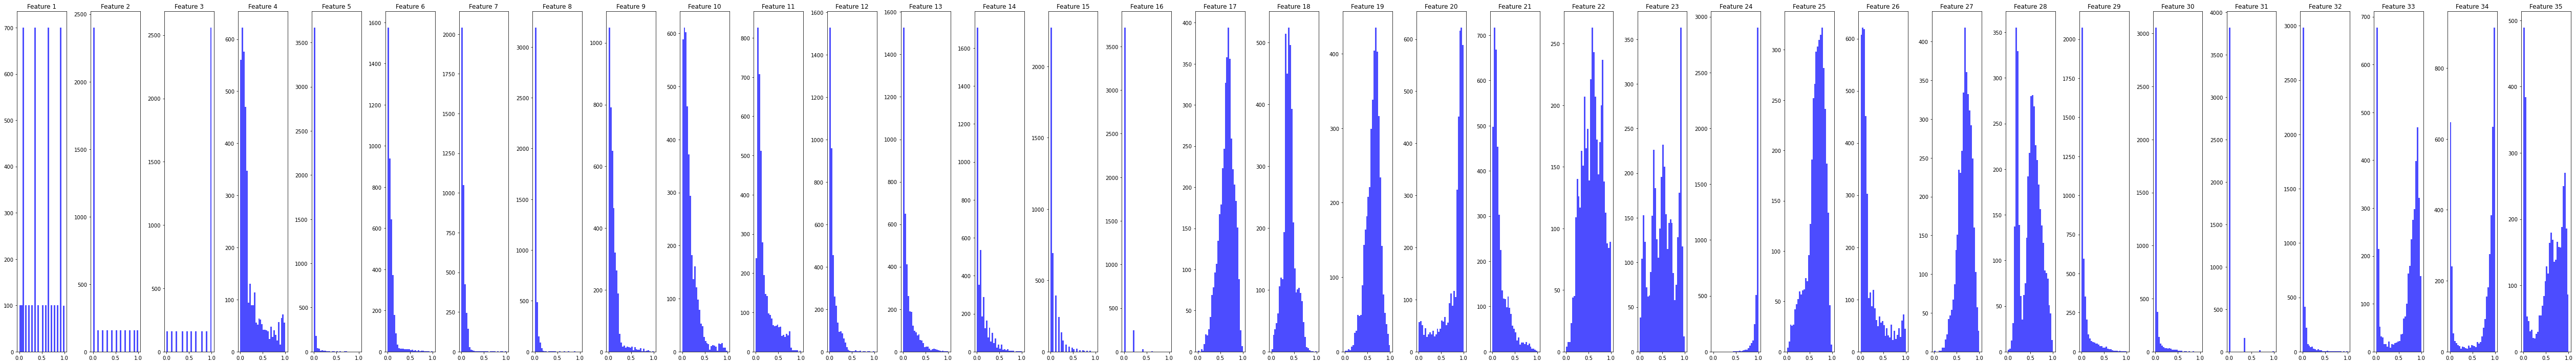

In [10]:
data = features_norm
fig, axs = plt.subplots(nrows=1, ncols=35, figsize=(70, 10))
for i in range(35):
    axs[i].hist(data[:, i], bins=30, color='blue', alpha=0.7)
    axs[i].set_title(f'Feature {i+1}')
plt.tight_layout()
plt.show()

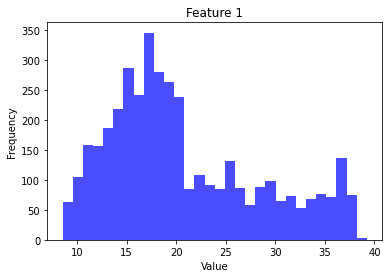

In [11]:
data = labels
plt.hist(data[:, 0], bins=30, color='blue', alpha=0.7)
plt.title('Feature 1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## Split the dataset into train , test and validation splits

In [12]:
# Split data into train and test sets
features_train, features_test, labels_train, labels_test = train_test_split(features_norm, labels, test_size=0.2, random_state=42)

print(f"features train shape: {features_train.shape}")
print(f"features test shape: {features_test.shape}") # tmp 
print(f"labels train shape: {labels_train.shape}")
print(f"labes test shape: {labels_test.shape}") # tmp

print(f"features train type: {type(features_train)}")
print(f"features test type: {type(features_test)}")
print(f"labels train type: {type(labels_train)}")
print(f"labes test type: {type(labels_test)}")

#test set again split into actual test and validation sets
features_validation, features_test, labels_validation, labels_test = train_test_split(features_test, labels_test, test_size=0.5, random_state=42)

print(f"features validation shape: {features_validation.shape}")
print(f"features test shape: {features_test.shape}")
print(f"labels validation shape: {labels_validation.shape}")
print(f"labes test shape: {labels_test.shape}")

print(f"features validation type: {type(features_validation)}")
print(f"features test type: {type(features_test)}")
print(f"labels validation type: {type(labels_validation)}")
print(f"labes test type: {type(labels_test)}")

features train shape: (3199, 35)
features test shape: (800, 35)
labels train shape: (3199, 1)
labes test shape: (800, 1)
features train type: <class 'numpy.ndarray'>
features test type: <class 'numpy.ndarray'>
labels train type: <class 'numpy.ndarray'>
labes test type: <class 'numpy.ndarray'>
features validation shape: (400, 35)
features test shape: (400, 35)
labels validation shape: (400, 1)
labes test shape: (400, 1)
features validation type: <class 'numpy.ndarray'>
features test type: <class 'numpy.ndarray'>
labels validation type: <class 'numpy.ndarray'>
labes test type: <class 'numpy.ndarray'>


In [13]:
def calc_MAPE_Percentage(actual_list , predicted_list):
#     assert len(predicted_list.shape) ==2
#     assert isinstance(predicted_list, list)
    assert len(actual_list.shape) == 2
    tmp=0
    num_samples = actual_list.shape[0]
        
    if len(predicted_list.shape) == 2:
#         print('con1')
        for i in range(num_samples):
            tmp += (np.abs(actual_list[i,0] - predicted_list[i,0]))/(np.abs(actual_list[i,0]))
    elif len(predicted_list.shape) == 1:
#         print('con2')
        for i in range(num_samples):
            tmp += (np.abs(actual_list[i,0] - predicted_list[i]))/(np.abs(actual_list[i,0])) 
    else:
        raise AssertionError
    MAPD = tmp/num_samples
    MAPD_perc = MAPD*100
    return MAPD_perc
    

## Model Training

## Linear Regression

In [14]:
models = {
    'Linear Regression': LinearRegression()
}

predictions_list = {'train':None,'test':None,'val':None}
models_ = []

for name, model in models.items():
    
    #train
    training_start = time.time()
    _tmp = model.fit(features_train, labels_train)
    training_end = time.time()
    
    models_.append(_tmp)
    
    #test and validation
    testing_start = time.time()
    predictions = model.predict(features_test)
    testing_end = time.time()
    predictions_list['test'] = predictions
    
    val_start = time.time()
    predictions = model.predict(features_validation)
    val_end = time.time()
    predictions_list['val'] = predictions
    
    train_start = time.time()
    predictions = model.predict(features_train)
    train_end = time.time()
    predictions_list['train'] = predictions
    
    #metrics for train, test and validation
    val_rmse = mean_squared_error(labels_validation, predictions_list['val'], squared = False)
    val_mse = mean_squared_error(labels_validation, predictions_list['val'], squared = True)
    val_mae = mean_absolute_error(labels_validation, predictions_list['val'])
    val_mapd = calc_MAPE_Percentage(labels_validation,predictions_list['val']) 
    val_r2 = r2_score(labels_validation, predictions_list['val'])
    print(f"Validation set with {name} - RMSE: {val_rmse:.10f}, MSE: {val_mse:.10f}, MAE: {val_mae:.10f} ,MAPD: {val_mapd:.8f}, R^2: {val_r2:.10f}")
    
    train_rmse = mean_squared_error(labels_train, predictions_list['train'], squared = False)
    train_mse = mean_squared_error(labels_train, predictions_list['train'], squared = True)
    train_mae = mean_absolute_error(labels_train, predictions_list['train'])
    train_mapd = calc_MAPE_Percentage(labels_train,predictions_list['train']) 
    train_r2 = r2_score(labels_train, predictions_list['train'])
    print(f"Train set with {name} - RMSE: {train_rmse:.10f}, MSE: {train_mse:.10f}, MAE: {train_mae:.10f},MAPD: {train_mapd:.8f}, R^2: {train_r2:.10f}")
    
    test_rmse = mean_squared_error(labels_test, predictions_list['test'], squared = False)
    test_mse = mean_squared_error(labels_test, predictions_list['test'], squared = True)
    test_mae = mean_absolute_error(labels_test, predictions_list['test'])
    test_mapd = calc_MAPE_Percentage(labels_test,predictions_list['test']) 
    test_r2 = r2_score(labels_test, predictions_list['test'])
    print(f"Test set with {name} - RMSE: {test_rmse:.10f}, MSE: {test_mse:.10f}, MAE: {test_mae:.10f},MAPD: {test_mapd:.8f}, R^2: {test_r2:.10f}")
    
    print("Time taken for training: {:.10f} seconds".format(training_end - training_start)) 
    print("Time taken for testing: {:.10f} seconds".format(testing_end - testing_start))
    print("Time taken for validation: {:.10f} seconds".format(val_end - val_start))

Validation set with Linear Regression - RMSE: 0.5193965284, MSE: 0.2697727537, MAE: 0.3731080940 ,MAPD: 2.06544412, R^2: 0.9951456976
Train set with Linear Regression - RMSE: 0.4775336268, MSE: 0.2280383648, MAE: 0.3456889744,MAPD: 1.84565347, R^2: 0.9960526171
Test set with Linear Regression - RMSE: 0.4866830859, MSE: 0.2368604261, MAE: 0.3504097305,MAPD: 1.75046855, R^2: 0.9960907167
Time taken for training: 0.0237665176 seconds
Time taken for testing: 0.0000000000 seconds
Time taken for validation: 0.0000000000 seconds


In [15]:
type(models['Linear Regression'])

sklearn.linear_model._base.LinearRegression

In [16]:
models['Linear Regression'].coef_[0]

array([ 1.03973158e-01,  6.88064631e-01, -1.36837104e-01, -5.47626239e+00,
        7.70151558e+00,  7.64973289e+00,  4.20310709e-01, -8.53453024e-01,
        1.30389646e+01,  1.10511175e+01,  1.24678929e+01,  1.06172168e+01,
        7.06455417e-01, -4.72568155e-01,  4.62671781e-01,  2.21909220e-01,
        1.15191664e+01, -3.81504721e+00, -8.43609748e-01, -3.07994969e+01,
        4.47507720e+00, -8.13790376e-01,  6.54915242e-01,  4.52043219e-01,
       -1.10866691e-02, -2.68424600e+01,  8.48924857e-01,  9.95513786e-01,
       -6.93497281e-01, -8.75040862e-02, -2.74209952e-01, -1.05024485e+00,
        8.17307325e+00, -5.16917967e+00, -3.02829014e+00])

In [17]:
type(_tmp)

sklearn.linear_model._base.LinearRegression

In [18]:
array_ = models['Linear Regression'].coef_[0]
array = np.abs(array_)
# Sort the array in descending order and get the original indices
sorted_indices = np.argsort(array)[::-1]
sorted_array = array[sorted_indices]


In [19]:
sorted_array

array([3.07994969e+01, 2.68424600e+01, 1.30389646e+01, 1.24678929e+01,
       1.15191664e+01, 1.10511175e+01, 1.06172168e+01, 8.17307325e+00,
       7.70151558e+00, 7.64973289e+00, 5.47626239e+00, 5.16917967e+00,
       4.47507720e+00, 3.81504721e+00, 3.02829014e+00, 1.05024485e+00,
       9.95513786e-01, 8.53453024e-01, 8.48924857e-01, 8.43609748e-01,
       8.13790376e-01, 7.06455417e-01, 6.93497281e-01, 6.88064631e-01,
       6.54915242e-01, 4.72568155e-01, 4.62671781e-01, 4.52043219e-01,
       4.20310709e-01, 2.74209952e-01, 2.21909220e-01, 1.36837104e-01,
       1.03973158e-01, 8.75040862e-02, 1.10866691e-02])

In [20]:
sorted_indices

array([19, 25,  8, 10, 16,  9, 11, 32,  4,  5,  3, 33, 20, 17, 34, 31, 27,
        7, 26, 18, 21, 12, 28,  1, 22, 13, 14, 23,  6, 30, 15,  2,  0, 29,
       24], dtype=int64)

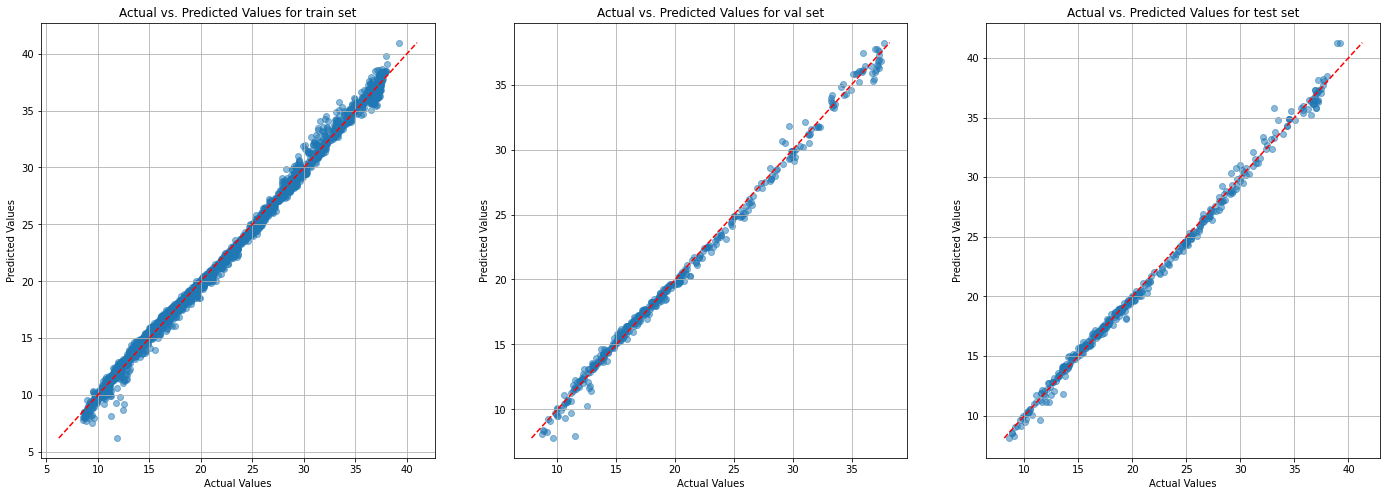

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))  # 1 row, 3 columns
set_d = ['train', 'val','test']
labels_set = [labels_train.squeeze(), labels_validation.squeeze(), labels_test.squeeze()]

for i in range(3):
    axs[i].scatter(labels_set[i], predictions_list[set_d[i]], alpha=0.5)
    axs[i].set_title(f"Actual vs. Predicted Values for {set_d[i]} set")
    axs[i].set_xlabel("Actual Values")
    axs[i].set_ylabel("Predicted Values")

    min_val = min(np.min(labels_set[i]), np.min(predictions_list[set_d[i]]))
    max_val = max(np.max(labels_set[i]), np.max(predictions_list[set_d[i]]))
    axs[i].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

    axs[i].grid(True)
plt.show()

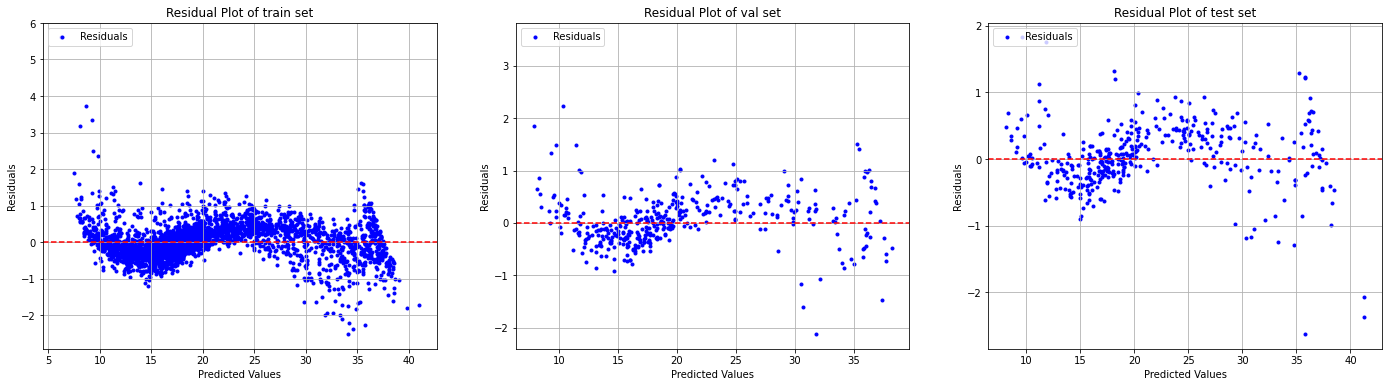

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(24, 6))  # 1 row, 3 columns
residuals_set =  {'train':None,'test':None,'val':None}

for i in range(3):

    residuals = labels_set[i] - predictions_list[set_d[i]].squeeze()
    residuals_set[set_d[i]] = residuals
    
#     plt.figure(figsize=(8, 6))
    axs[i].scatter(predictions_list[set_d[i]], residuals, color='blue', marker='.', label='Residuals')
    axs[i].axhline(y=0, color='red', linestyle='--')
    axs[i].set_xlabel('Predicted Values')
    axs[i].set_ylabel('Residuals')
    axs[i].set_title(f'Residual Plot of {set_d[i]} set')
    axs[i].legend(loc='upper left')
    axs[i].grid(True)
plt.show()

3199
400
400


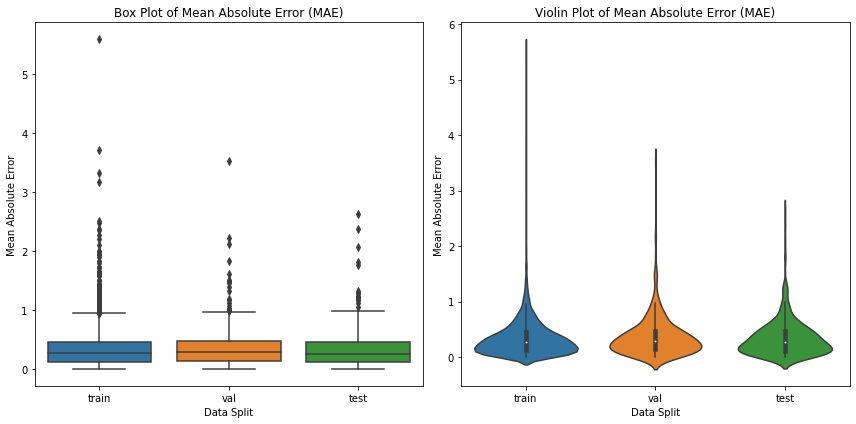

In [23]:
#train, test, val
df_list =[]
for i in range(3):
    num_samples = residuals_set[set_d[i]].shape[0]
    print(num_samples)
    mae_values = [abs(residuals_set[set_d[i]][j]) for j in range(num_samples)]
    df_list.append(pd.DataFrame(mae_values, columns=['MAE']))
    df_list[i]['Data Split'] = set_d[i]

combined_mae_df = pd.concat([df_list[0], df_list[1], df_list[2]])
    
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1) 
sns.boxplot(x='Data Split', y='MAE', data=combined_mae_df)
# sns.boxplot(data=mae_df, y='MAE')
plt.title('Box Plot of Mean Absolute Error (MAE)')
plt.xlabel('Data Split')
plt.ylabel('Mean Absolute Error')

# Violin plot
plt.subplot(1, 2, 2)  
# sns.violinplot(data=mae_df, y='MAE')
sns.violinplot(x='Data Split', y='MAE', data=combined_mae_df)
plt.title('Violin Plot of Mean Absolute Error (MAE)')
plt.xlabel('Data Split')
plt.ylabel('Mean Absolute Error')

plt.tight_layout()
plt.show()

In [24]:
col_names_str = "T, tau, time, Volume, S_100, S_111, S_110, S_311, Curve_1-10, Curve_11-20, Curve_21-30, Curve_31-40, Curve_41-50, Curve_51-60, Curve_61-70, Curve_71-80, Avg_total, Avg_bulk, Avg_surf, Total_E, Formation_E, Avg_bonds, Std_bonds, Max_bonds, Min_bonds, N_bonds, angle_avg, angle_std, FCC, HCP, ICOS, DECA, q6q6_avg_total, q6q6_avg_bulk, q6q6_avg_surf"
cols = col_names_str.split(',')
cols =[c.strip() for c in cols]
# print(cols)
cols_np = np.array(cols)
print(cols_np)
print(cols_np.shape)

['T' 'tau' 'time' 'Volume' 'S_100' 'S_111' 'S_110' 'S_311' 'Curve_1-10'
 'Curve_11-20' 'Curve_21-30' 'Curve_31-40' 'Curve_41-50' 'Curve_51-60'
 'Curve_61-70' 'Curve_71-80' 'Avg_total' 'Avg_bulk' 'Avg_surf' 'Total_E'
 'Formation_E' 'Avg_bonds' 'Std_bonds' 'Max_bonds' 'Min_bonds' 'N_bonds'
 'angle_avg' 'angle_std' 'FCC' 'HCP' 'ICOS' 'DECA' 'q6q6_avg_total'
 'q6q6_avg_bulk' 'q6q6_avg_surf']
(35,)


## Shap Analysis

### Converting numpys to dataframes

In [25]:
pd.options.display.max_columns = None
features_train_df = pd.DataFrame(features_train, columns=cols)
features_train_df.head()

,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
0,0.357143,0.0,1.0,0.121008,0.057915,0.107854,0.020307,0.029928,0.148205,0.102843,0.059438,0.001174,0.000000,0.000000,0.0,0.0,0.666721,0.328632,0.563220,0.881721,0.097807,0.392482,0.266821,0.996049,0.818133,0.115757,0.797784,0.641690,0.074483,0.056823,0.0,0.060976,0.907309,0.952472,0.863790
1,0.071429,0.0,1.0,0.094118,0.000000,0.140549,0.044758,0.033024,0.139037,0.069398,0.059438,0.021139,0.000000,0.000000,0.0,0.0,0.604777,0.326268,0.700351,0.906289,0.061205,0.235131,0.082807,0.988147,0.903067,0.089253,0.816472,0.725791,0.059987,0.049144,0.0,0.085366,0.908386,0.949666,0.944866
2,0.928571,0.0,1.0,0.128151,0.000000,0.113115,0.025280,0.002064,0.130634,0.169732,0.062704,0.027598,0.025641,0.022222,0.0,0.0,0.700475,0.471058,0.726992,0.879346,0.161850,0.741993,0.696828,0.998204,0.597269,0.123762,0.668383,0.442706,0.018324,0.016235,0.0,0.012195,0.728838,0.827630,0.562978
3,0.928571,0.0,1.0,0.115126,0.000000,0.051484,0.020721,0.004128,0.081742,0.141304,0.103201,0.042866,0.025641,0.044444,0.0,0.0,0.677566,0.433393,0.627610,0.892252,0.151954,0.756526,0.743001,0.992816,0.549163,0.110572,0.647262,0.485310,0.017322,0.002852,0.0,0.000000,0.664866,0.803323,0.380958
4,0.928571,0.0,1.0,0.006261,0.000000,0.001879,0.010361,0.004128,0.004966,0.051003,0.036577,0.014680,0.019231,0.000000,0.0,0.0,0.267679,0.425648,0.298146,0.994267,0.021339,0.698753,0.959020,0.985273,0.661096,0.005949,0.275268,0.149671,0.000000,0.000000,0.0,0.000000,0.047440,0.050969,0.058316


In [26]:
features_test_df = pd.DataFrame(features_test, columns=cols)
features_test_df.head()

,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
0,0.642857,0.0,1.0,0.137815,0.034106,0.067644,0.030253,0.009288,0.141329,0.089465,0.094056,0.044040,0.025641,0.044444,0.000000,0.0,0.699216,0.434861,0.629781,0.867766,0.144070,0.586346,0.534771,0.970905,0.708974,0.132962,0.709989,0.586149,0.057617,0.015358,0.0,0.000000,0.830782,0.930319,0.641046
1,0.071429,0.0,1.0,0.113025,0.000000,0.197670,0.048902,0.000000,0.198625,0.000836,0.041803,0.037581,0.000000,0.000000,0.000000,0.0,0.634551,0.331812,0.739686,0.887331,0.070192,0.262313,0.068921,0.719828,0.892165,0.107702,0.846525,0.957676,0.097912,0.000000,0.0,0.000000,0.944114,0.984828,0.971144
2,0.928571,0.0,1.0,0.044118,0.000000,0.003382,0.012433,0.007224,0.010313,0.113712,0.081646,0.029360,0.070513,0.022222,0.000000,0.0,0.457858,0.262922,0.443878,0.959670,0.078529,0.798152,0.934918,0.971264,0.556526,0.040876,0.481406,0.177720,0.000000,0.000000,0.0,0.000000,0.024286,0.024908,0.031550
3,1.000000,0.9,0.0,0.021807,0.000000,0.001127,0.003315,0.002064,0.009549,0.078595,0.045069,0.022901,0.089744,0.111111,0.058824,0.0,0.197612,0.026333,0.000000,0.979421,0.037220,0.707365,0.993283,0.946121,0.330810,0.018708,0.444691,0.093384,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.004378
4,0.928571,0.0,1.0,0.158403,0.003218,0.090192,0.018235,0.006192,0.123377,0.184783,0.095363,0.032883,0.070513,0.044444,0.058824,0.0,0.719160,0.418718,0.648071,0.851018,0.195826,0.774468,0.692651,0.993894,0.675868,0.152926,0.685985,0.500107,0.027806,0.018210,0.0,0.036585,0.716461,0.814078,0.491552


### SHAP value calculation 

In [27]:
# features_train
train_feature_sample_df = shap.utils.sample(features_train_df, 2500) 
print(train_feature_sample_df.shape)

LR_model = models['Linear Regression']
# explainer__ = shap.Explainer(LR_model.predict, train_feature_sample_df) #this was probly from chatgpt!
explainer__ = shap.Explainer(LR_model, train_feature_sample_df)
shap_values = explainer__(features_test_df)
print(shap_values.feature_names)

(2500, 35)
['T', 'tau', 'time', 'Volume', 'S_100', 'S_111', 'S_110', 'S_311', 'Curve_1-10', 'Curve_11-20', 'Curve_21-30', 'Curve_31-40', 'Curve_41-50', 'Curve_51-60', 'Curve_61-70', 'Curve_71-80', 'Avg_total', 'Avg_bulk', 'Avg_surf', 'Total_E', 'Formation_E', 'Avg_bonds', 'Std_bonds', 'Max_bonds', 'Min_bonds', 'N_bonds', 'angle_avg', 'angle_std', 'FCC', 'HCP', 'ICOS', 'DECA', 'q6q6_avg_total', 'q6q6_avg_bulk', 'q6q6_avg_surf']


### SHAP to Dataframe

In [28]:
#shap values converted to a dataframe

print(type(shap_values))
print(type(shap_values.values))
shap_values_df = pd.DataFrame(shap_values.values, columns=cols)
shap_values_abs_df = shap_values_df.abs()
shap_values_df.head()

<class 'shap._explanation.Explanation'>
<class 'numpy.ndarray'>


,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
0,0.019116,-0.167888,-0.025239,0.659372,0.195412,-0.047635,-0.015928,0.014048,0.462390,-0.866256,-1.540856,-0.629053,-0.085499,0.036650,-0.029393,-0.003551,0.621878,-0.084633,0.001358,-3.752625,-0.160930,-0.018162,0.015402,0.003603,-0.000652,3.194599,0.023140,0.081526,0.034041,0.004057,0.001828,0.059364,1.501039,-1.130456,-0.261667
1,-0.040297,-0.167888,-0.025239,0.795128,-0.067252,0.947032,-0.008089,0.021975,1.209466,-1.845703,-2.192346,-0.697632,-0.103613,0.057653,-0.029393,-0.003551,-0.123015,0.308504,-0.091359,-4.355239,-0.491542,0.245533,-0.289690,-0.109895,-0.002683,3.872635,0.139049,0.451386,0.006097,0.005401,0.001828,0.059364,2.427316,-1.412223,-1.261298
2,0.048823,-0.167888,-0.025239,1.172484,-0.067252,-0.539218,-0.023418,0.015810,-1.245923,-0.598294,-1.695585,-0.784913,-0.053799,0.047152,-0.029393,-0.003551,-2.158369,0.571321,0.158187,-6.583221,-0.454232,-0.190528,0.277464,0.003765,0.001038,5.666408,-0.170909,-0.325070,0.073999,0.005401,0.001828,0.059364,-5.090512,3.549775,1.584065
3,0.056249,0.451370,0.111598,1.294664,-0.067252,-0.556467,-0.027250,0.020213,-1.255884,-0.986377,-2.151628,-0.853492,-0.040214,0.005146,-0.002177,-0.003551,-5.156187,1.473919,0.532647,-7.191561,-0.639095,-0.116646,0.315689,-0.007601,0.003540,6.261468,-0.202078,-0.409028,0.073999,0.005401,0.001828,0.059364,-5.289000,3.678530,1.666351
4,0.048823,-0.167888,-0.025239,0.546625,-0.042472,0.124851,-0.020979,0.016690,0.228306,0.187111,-1.524568,-0.747507,-0.053799,0.036650,-0.002177,-0.003551,0.851615,-0.023050,-0.014072,-3.236811,0.070680,-0.171254,0.118800,0.013995,-0.000285,2.658715,0.002763,-0.004130,0.054715,0.003808,0.001828,0.020941,0.566692,-0.529587,0.191045


In [29]:
shap_values_df.describe()

,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.001619,-0.014105,0.002167,0.025524,0.039164,0.062907,-0.005246,-0.002563,0.127526,-0.005290,-0.087951,-0.135100,-0.015012,0.001523,0.003198,0.000333,0.069599,0.071697,-0.001017,-0.159909,0.015435,-0.006512,0.001990,0.001434,-0.000008,0.132464,0.007638,0.007668,0.000863,0.001007,-0.002514,0.012984,-0.072467,0.078230,0.002627
std,0.033296,0.220400,0.042266,1.504922,0.330843,0.899097,0.026273,0.056803,1.671577,1.713115,2.543524,1.060064,0.105643,0.072116,0.058657,0.013685,1.875112,0.502467,0.129259,8.395910,0.757812,0.177244,0.172495,0.026496,0.002118,7.304135,0.120315,0.217759,0.114450,0.009847,0.022463,0.119488,2.878327,1.953000,0.984732
min,-0.047724,-0.167888,-0.025239,-4.039169,-0.067252,-0.562217,-0.028643,-0.621858,-1.355495,-1.854943,-2.607671,-1.077931,-0.103613,-0.414915,-0.029393,-0.003551,-5.555304,-1.536193,-0.293983,-7.803572,-0.795875,-0.347927,-0.329282,-0.178416,-0.003586,-20.078829,-0.361890,-0.411243,-0.592186,-0.060006,-0.272382,-0.971669,-5.289000,-1.457415,-1.326915
25%,-0.032870,-0.167888,-0.025239,-0.560132,-0.067252,-0.419197,-0.019760,-0.003567,-0.847483,-1.208138,-1.850313,-0.811410,-0.090028,-0.036860,-0.029393,-0.003551,-1.011552,-0.125300,-0.086956,-5.845231,-0.532556,-0.154281,-0.125351,0.000518,-0.001463,-2.674586,-0.061860,-0.156202,-0.001885,0.002478,0.001828,0.020941,-1.885857,-1.315549,-0.801403
50%,-0.003164,-0.167888,-0.025239,0.726099,-0.052384,-0.142502,-0.013315,0.012287,-0.287176,-0.533614,-1.211039,-0.541771,-0.058328,0.031400,-0.029393,-0.003551,0.306047,0.076789,-0.021152,-4.065691,-0.258764,-0.006846,-0.002250,0.011559,-0.000331,3.527832,0.016481,0.040651,0.050258,0.004921,0.001828,0.059364,1.320412,-1.010140,-0.253210
75%,0.026543,0.124540,0.020374,1.052834,0.007087,0.180909,-0.000294,0.018452,0.518421,0.732275,0.902232,0.108167,0.028847,0.057653,0.025039,-0.003551,1.385486,0.336885,0.073026,2.940382,0.416314,0.124143,0.132949,0.015294,0.000960,5.090275,0.091138,0.151253,0.072102,0.005401,0.001828,0.059364,2.045249,1.171126,0.857252
max,0.056249,0.520177,0.111598,1.414084,2.757628,6.863285,0.214869,0.021975,11.255147,8.604810,8.907418,5.929557,0.480571,0.057653,0.378847,0.085213,4.072621,1.485116,0.532647,22.753994,3.099627,0.434836,0.315689,0.016755,0.007208,6.748424,0.253272,0.477027,0.073999,0.005401,0.001828,0.059364,2.852753,3.678530,1.666351


In [30]:
shap_values_abs_df.describe()

,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.029342,0.192011,0.034466,1.190578,0.118750,0.474122,0.018358,0.024051,1.008903,1.273223,2.039210,0.827900,0.085166,0.055258,0.037822,0.006866,1.471557,0.378556,0.100218,6.626240,0.579183,0.146441,0.143837,0.017077,1.618849e-03,5.755558,0.094988,0.180109,0.081287,0.006548,0.006014,0.072238,2.437815,1.645428,0.839885
std,0.015752,0.108697,0.024499,0.918920,0.311220,0.766151,0.019493,0.051509,1.337922,1.144391,1.519365,0.674461,0.064148,0.046282,0.044909,0.011838,1.161891,0.337583,0.081488,5.147800,0.488082,0.099796,0.094960,0.020291,1.363895e-03,4.489822,0.074088,0.122301,0.080470,0.007416,0.021786,0.095994,1.527153,1.051726,0.512376
min,0.003164,0.030275,0.005169,0.001001,0.002131,0.001236,0.000098,0.000044,0.004184,0.002310,0.001710,0.000623,0.000543,0.005146,0.002177,0.003551,0.004169,0.000034,0.000371,0.034472,0.001008,0.000527,0.000430,0.000031,1.101111e-07,0.069215,0.000055,0.001182,0.000668,0.000147,0.001828,0.001729,0.072709,0.060105,0.014201
25%,0.018017,0.167888,0.025239,0.689859,0.042472,0.156876,0.009788,0.010525,0.373936,0.628324,1.181681,0.466958,0.044742,0.036650,0.025039,0.003551,0.526342,0.107270,0.039957,3.846732,0.313534,0.060203,0.058339,0.009936,5.451297e-04,3.350223,0.035571,0.070201,0.041217,0.004187,0.001828,0.051360,1.371977,1.034009,0.368779
50%,0.026543,0.167888,0.025239,0.981505,0.062296,0.358109,0.016886,0.016690,0.767795,1.122668,1.695585,0.747507,0.080971,0.047257,0.029393,0.003551,1.174656,0.284866,0.079472,5.448695,0.501321,0.137031,0.130704,0.014320,1.312710e-03,4.714314,0.077269,0.154071,0.065463,0.005324,0.001828,0.059364,2.038922,1.313208,0.814300
75%,0.041396,0.169952,0.025239,1.287244,0.067252,0.508315,0.021545,0.020213,1.169622,1.606616,2.265638,0.947008,0.103613,0.057653,0.029393,0.003551,2.163483,0.539665,0.139919,7.092652,0.690334,0.222547,0.240090,0.016106,2.313591e-03,6.194876,0.139314,0.290519,0.073999,0.005401,0.001828,0.059364,2.742653,1.449160,1.231434
max,0.056249,0.520177,0.111598,4.039169,2.757628,6.863285,0.214869,0.621858,11.255147,8.604810,8.907418,5.929557,0.480571,0.414915,0.378847,0.085213,5.555304,1.536193,0.532647,22.753994,3.099627,0.434836,0.329282,0.178416,7.207864e-03,20.078829,0.361890,0.477027,0.592186,0.060006,0.272382,0.971669,5.289000,3.678530,1.666351


In [31]:
sorted_columns = shap_values_abs_df.describe().loc['mean'].sort_values(ascending=False).index
shap_values_abs_df_describe_sorted = shap_values_abs_df.describe()[sorted_columns]
shap_values_abs_df_describe_sorted

,Total_E,N_bonds,q6q6_avg_total,Curve_21-30,q6q6_avg_bulk,Avg_total,Curve_11-20,Volume,Curve_1-10,q6q6_avg_surf,Curve_31-40,Formation_E,S_111,Avg_bulk,tau,angle_std,Avg_bonds,Std_bonds,S_100,Avg_surf,angle_avg,Curve_41-50,FCC,DECA,Curve_51-60,Curve_61-70,time,T,S_311,S_110,Max_bonds,Curve_71-80,HCP,ICOS,Min_bonds
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02
mean,6.626240,5.755558,2.437815,2.039210,1.645428,1.471557,1.273223,1.190578,1.008903,0.839885,0.827900,0.579183,0.474122,0.378556,0.192011,0.180109,0.146441,0.143837,0.118750,0.100218,0.094988,0.085166,0.081287,0.072238,0.055258,0.037822,0.034466,0.029342,0.024051,0.018358,0.017077,0.006866,0.006548,0.006014,1.618849e-03
std,5.147800,4.489822,1.527153,1.519365,1.051726,1.161891,1.144391,0.918920,1.337922,0.512376,0.674461,0.488082,0.766151,0.337583,0.108697,0.122301,0.099796,0.094960,0.311220,0.081488,0.074088,0.064148,0.080470,0.095994,0.046282,0.044909,0.024499,0.015752,0.051509,0.019493,0.020291,0.011838,0.007416,0.021786,1.363895e-03
min,0.034472,0.069215,0.072709,0.001710,0.060105,0.004169,0.002310,0.001001,0.004184,0.014201,0.000623,0.001008,0.001236,0.000034,0.030275,0.001182,0.000527,0.000430,0.002131,0.000371,0.000055,0.000543,0.000668,0.001729,0.005146,0.002177,0.005169,0.003164,0.000044,0.000098,0.000031,0.003551,0.000147,0.001828,1.101111e-07
25%,3.846732,3.350223,1.371977,1.181681,1.034009,0.526342,0.628324,0.689859,0.373936,0.368779,0.466958,0.313534,0.156876,0.107270,0.167888,0.070201,0.060203,0.058339,0.042472,0.039957,0.035571,0.044742,0.041217,0.051360,0.036650,0.025039,0.025239,0.018017,0.010525,0.009788,0.009936,0.003551,0.004187,0.001828,5.451297e-04
50%,5.448695,4.714314,2.038922,1.695585,1.313208,1.174656,1.122668,0.981505,0.767795,0.814300,0.747507,0.501321,0.358109,0.284866,0.167888,0.154071,0.137031,0.130704,0.062296,0.079472,0.077269,0.080971,0.065463,0.059364,0.047257,0.029393,0.025239,0.026543,0.016690,0.016886,0.014320,0.003551,0.005324,0.001828,1.312710e-03
75%,7.092652,6.194876,2.742653,2.265638,1.449160,2.163483,1.606616,1.287244,1.169622,1.231434,0.947008,0.690334,0.508315,0.539665,0.169952,0.290519,0.222547,0.240090,0.067252,0.139919,0.139314,0.103613,0.073999,0.059364,0.057653,0.029393,0.025239,0.041396,0.020213,0.021545,0.016106,0.003551,0.005401,0.001828,2.313591e-03
max,22.753994,20.078829,5.289000,8.907418,3.678530,5.555304,8.604810,4.039169,11.255147,1.666351,5.929557,3.099627,6.863285,1.536193,0.520177,0.477027,0.434836,0.329282,2.757628,0.532647,0.361890,0.480571,0.592186,0.971669,0.414915,0.378847,0.111598,0.056249,0.621858,0.214869,0.178416,0.085213,0.060006,0.272382,7.207864e-03


In [32]:
# this is to make sure that shap real values are not the ones used to get the feature order importance

# sorted_columns_ = shap_values_df.describe().loc['mean'].sort_values(ascending=False).index
# shap_values_df_describe_sorted = shap_values_df.describe()[sorted_columns_]
# shap_values_df_describe_sorted

### SHAP Summary plots and csv file saved

In [33]:
tmp__ = shap_values_abs_df_describe_sorted.loc[['mean','std']]
tmp__.to_csv('LR_summary_shap_descending_order.csv', index=False)
tmp__.head()

,Total_E,N_bonds,q6q6_avg_total,Curve_21-30,q6q6_avg_bulk,Avg_total,Curve_11-20,Volume,Curve_1-10,q6q6_avg_surf,Curve_31-40,Formation_E,S_111,Avg_bulk,tau,angle_std,Avg_bonds,Std_bonds,S_100,Avg_surf,angle_avg,Curve_41-50,FCC,DECA,Curve_51-60,Curve_61-70,time,T,S_311,S_110,Max_bonds,Curve_71-80,HCP,ICOS,Min_bonds
mean,6.62624,5.755558,2.437815,2.039210,1.645428,1.471557,1.273223,1.190578,1.008903,0.839885,0.827900,0.579183,0.474122,0.378556,0.192011,0.180109,0.146441,0.143837,0.11875,0.100218,0.094988,0.085166,0.081287,0.072238,0.055258,0.037822,0.034466,0.029342,0.024051,0.018358,0.017077,0.006866,0.006548,0.006014,0.001619
std,5.14780,4.489822,1.527153,1.519365,1.051726,1.161891,1.144391,0.918920,1.337922,0.512376,0.674461,0.488082,0.766151,0.337583,0.108697,0.122301,0.099796,0.094960,0.31122,0.081488,0.074088,0.064148,0.080470,0.095994,0.046282,0.044909,0.024499,0.015752,0.051509,0.019493,0.020291,0.011838,0.007416,0.021786,0.001364


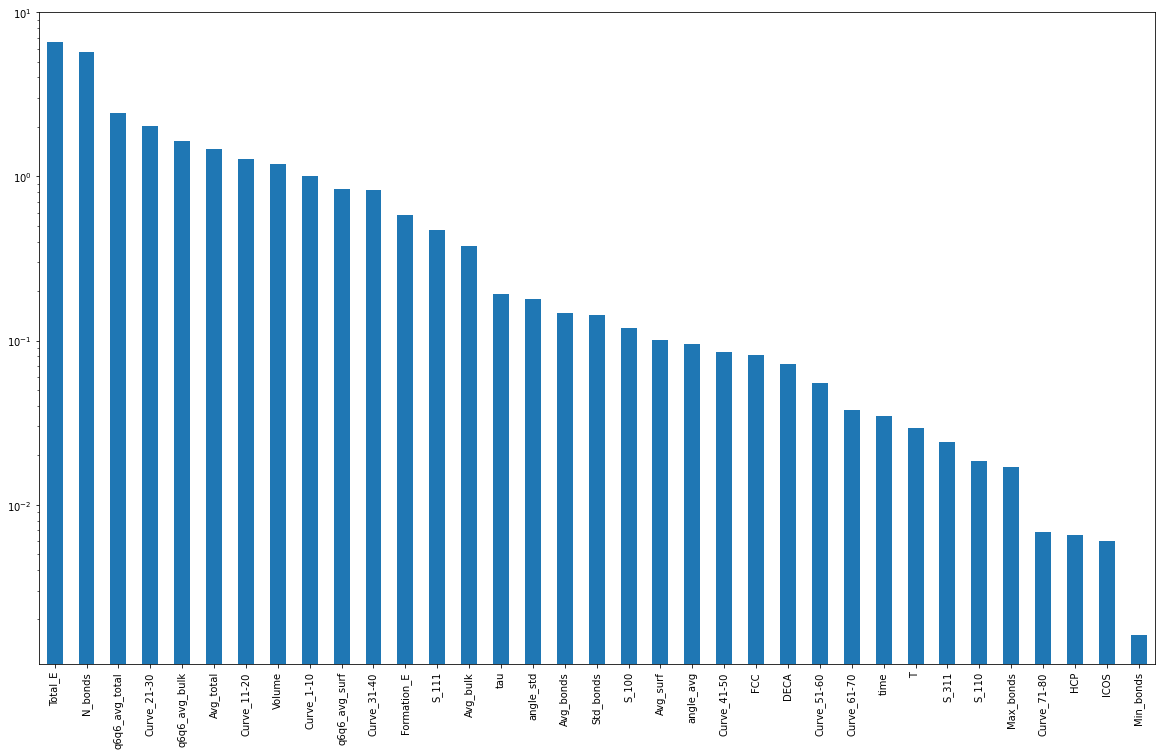

In [34]:
plt.figure(figsize=(20, 12))
shap_values_abs_df_describe_sorted.loc['mean'].plot(kind='bar',logy=True)
plt.show()

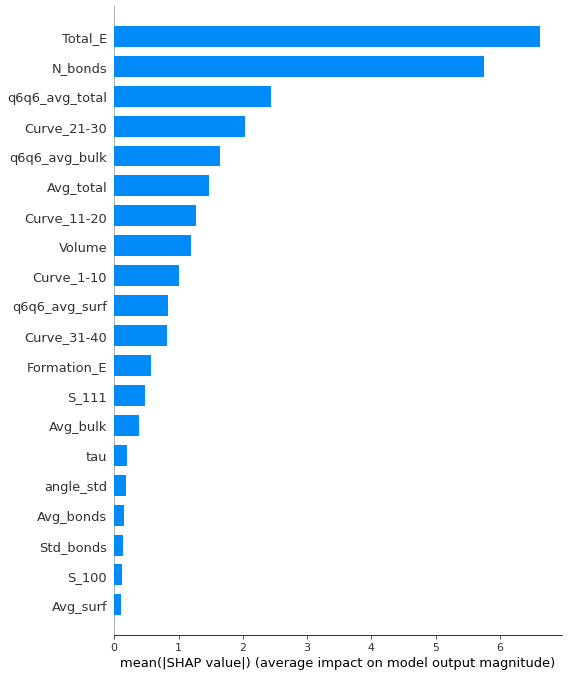

In [35]:
#SHAP API for the above bar plot -same results but nnot in log scale
shap.summary_plot(shap_values, features_test_df, plot_type="bar")

In [36]:
print(features_test.shape)
print(predictions_list['test'][0]) # predicted value
print(labels_test[0]) #original labels
print(set_d)

(400, 35)
[19.32481079]
[19.7274]
['train', 'val', 'test']


In [37]:
test_residu = []
for i in range(labels_test.shape[0]):
    test_residu.append((labels_test[i] - predictions_list['test'][i])[0])

In [38]:
test_residu_np = np.array(test_residu)
test_residu_np_abs = np.abs(test_residu_np)
print(test_residu_np.shape)
print(test_residu_np_abs.sum()/400) #sanity test to check if we get the MAE loss correctly
sorted_indices = np.argsort(test_residu_np_abs)
print(sorted_indices[:10])

(400,)
0.35040973049390556
[128  32   1  44  95 197 380  85 102 239]


In [39]:
len(sorted_indices) #numbe of test samples
samples_ = (labels_test.shape[0]*10)//100 # number of samples for 10%
worst_set_ind = sorted_indices[-1*samples_:] # worst 10% - when ascending order based sorted, highest values are in the right side
best_set_ind = sorted_indices[:samples_] # best 10% - when ascending order based sorted, smallest values are to the left

#we need the corrosponding shap values
best_10 = shap_values[best_set_ind]
worst_10 = shap_values[worst_set_ind]

print(best_10.shape)
print(worst_10.shape)

best_10_values = test_residu_np[list(best_set_ind)] #best 10% of residual values - closest to zero
worst_10_values = test_residu_np[list(worst_set_ind)] #worst 10% of residual values - furthest from zero

print(best_10_values.shape)
print(worst_10_values.shape)

(40, 35)
(40, 35)
(40,)
(40,)


In [40]:
best_10_values

array([-0.00102516, -0.00125521,  0.00207034, -0.00281419, -0.00368199,
        0.00749668,  0.00769714,  0.00771863,  0.0088104 , -0.00993512,
       -0.01009305,  0.01219684, -0.01334988,  0.01515509, -0.01594578,
       -0.01658455,  0.01667068, -0.01728964,  0.01750693,  0.01835578,
        0.02135729,  0.02214325,  0.02663578, -0.02717272, -0.0272397 ,
        0.03158667,  0.03249112,  0.03569538, -0.03657377, -0.03684485,
       -0.03809496, -0.03830384, -0.03897749, -0.03951709,  0.0400327 ,
       -0.0413694 ,  0.04206567, -0.04218494, -0.04526091,  0.04760998])

In [41]:
worst_10_values

array([ 0.70280674,  0.70430759, -0.71182708,  0.71671986,  0.72963011,
       -0.73260436,  0.74519648,  0.76701633,  0.80406983,  0.84032499,
       -0.8550067 , -0.85608371, -0.86431159,  0.87639161,  0.87656079,
        0.88672097, -0.89544404, -0.91149527,  0.91377117,  0.92409396,
        0.92556469, -0.98349664,  0.98517457, -0.9953462 , -1.05642479,
        1.11939143, -1.17689597, -1.1812259 ,  1.20145762,  1.21827195,
        1.23245143, -1.24305807,  1.28670225, -1.29544891,  1.32125352,
        1.76028389,  1.82606004, -2.06993137, -2.37194882, -2.62962039])

### Best/Worst distribution on residual plots

In [42]:
# best_status = {'all_p':None, 'all_n':None,'all_p_n':None}

# test_residu_np_abs + test_residu_np


# for value in best_10_values:
# #     print(value)
#     if value >= 0:
        

In [43]:
# worst_status = {'all_p':None, 'all_n':None,'all_p_n':None}



In [44]:
# shap_values.feature_names = cols
# best_10.feature_names = cols
# worst_10.feature_names = cols

# SHAP preview

### Best 10% samples of test set

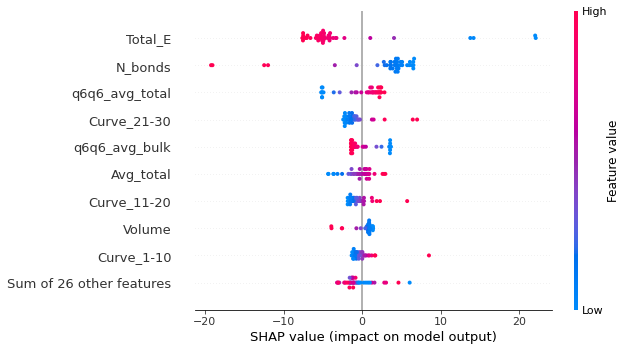

In [45]:
shap.plots.beeswarm(best_10,max_display=10)

### Worst 10% samples of test set

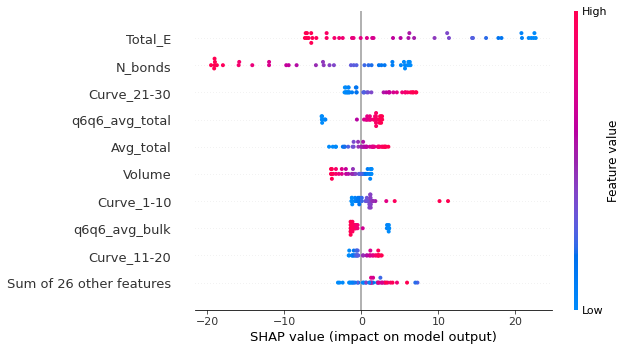

In [46]:
shap.plots.beeswarm(worst_10,max_display=10)

### For full test set

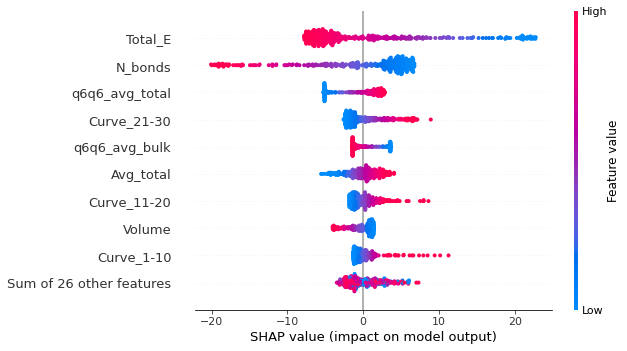

In [47]:
shap.plots.beeswarm(shap_values,max_display=10)

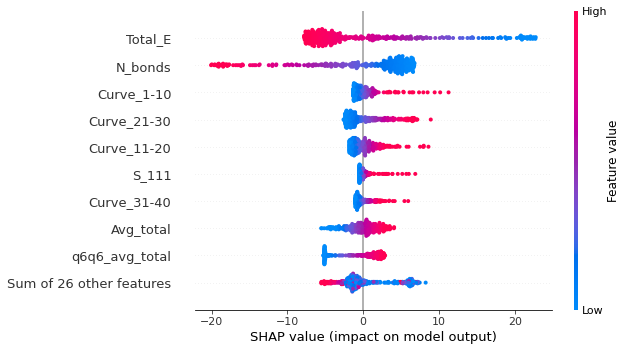

In [48]:
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0), max_display=10)


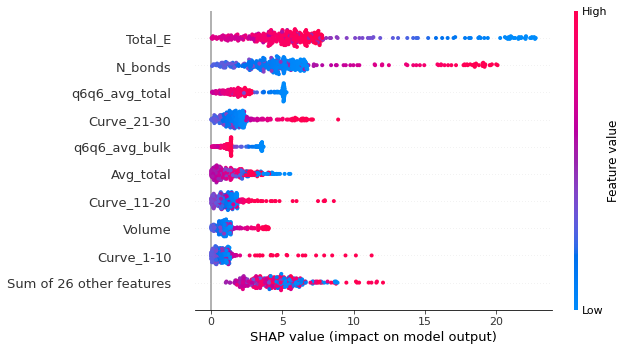

In [49]:
shap.plots.beeswarm(shap_values.abs, max_display=10)

### Patial Dependacy Plot and Scatter Plot

In [50]:
type(shap_values)

shap._explanation.Explanation

In [51]:
shap_values.data.shape

(400, 35)

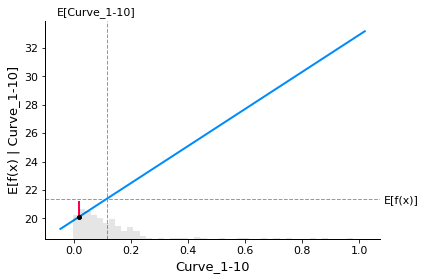

In [52]:
fig, ax = shap.partial_dependence_plot(
    'Curve_1-10',
    LR_model.predict,
    features_test_df,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values[12 :12  + 1, :],
)

#this plot only shows the dependancy between feature (x) and final predicted value(y)
# SHAP value for the given feature for a given sample is shown by red line.
# magnitude of thta red line is  the |SHAP_feature_k| where feature k is the selected feature

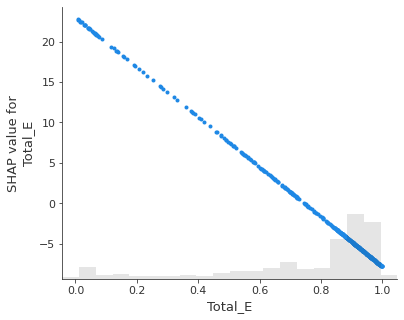

In [53]:
shap.plots.scatter(shap_values[:, "Total_E"])

### SHAP for a given sample

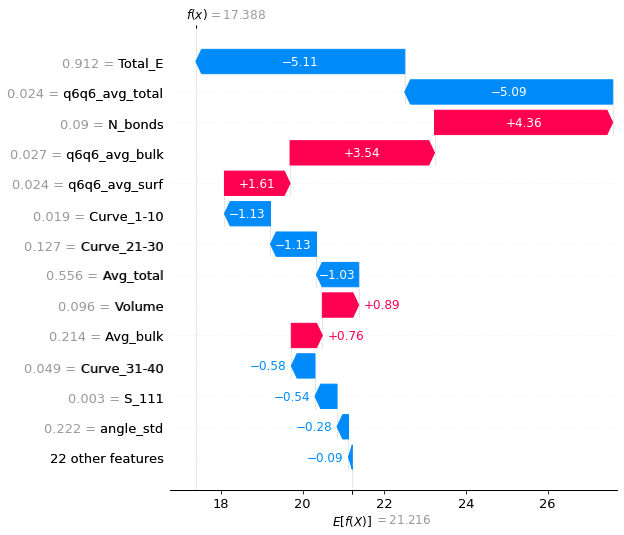

In [54]:
shap.plots.waterfall(shap_values[12], max_display=14)

In [55]:
print(labels_test[12])
print(labels_test[12] - predictions_list['test'][12])
print(predictions_list['test'][12])
print(sum(predictions_list['test'])/400)
# print(sum(labels_test)/400)

[17.5341]
[0.14655659]
[17.38754341]
[21.37630915]


### Heatmap

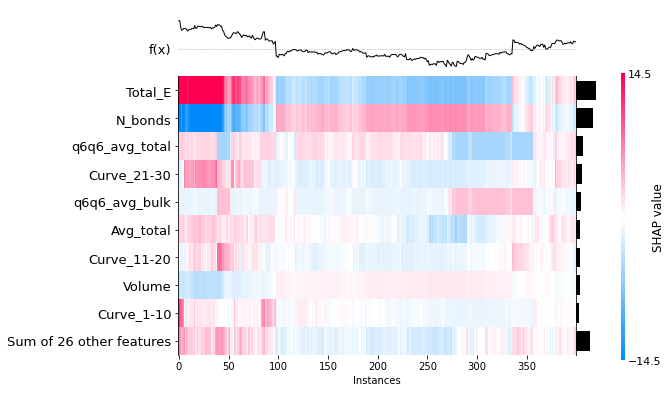

In [56]:
shap.plots.heatmap(shap_values,max_display=10)


### Clustering

In [57]:
clustering = shap.utils.hclust(features_test_df, labels_test)

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
No/low signal found from feature 30 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).


In [58]:
# clustering

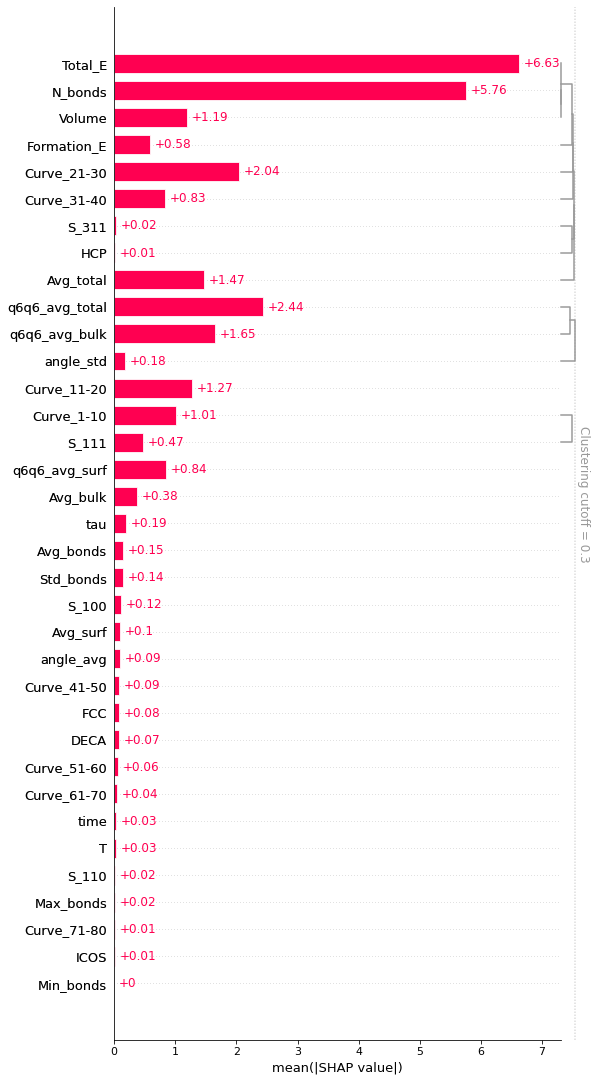

In [59]:
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=.3,max_display=35)

# SHAP Full view

### For best 10% samples

In [60]:
features_num = best_10.shape[1]

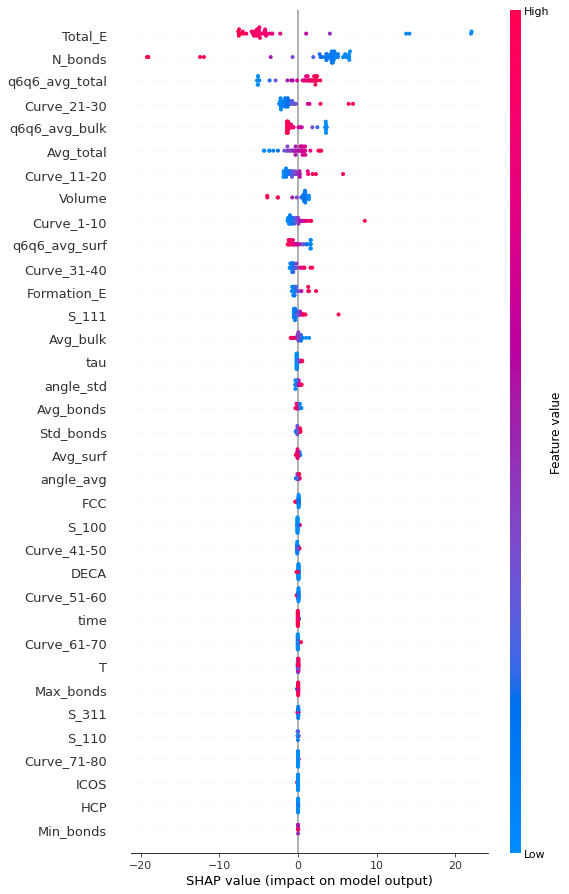

In [61]:
shap.plots.beeswarm(best_10,max_display=features_num)

### For worst 10% sampels

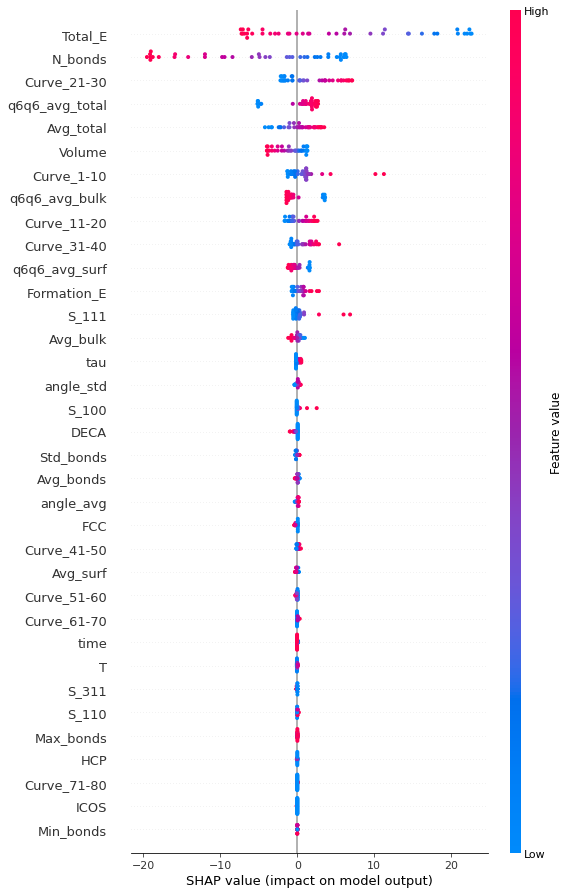

In [62]:
shap.plots.beeswarm(worst_10,max_display=features_num)

### For full test dataset

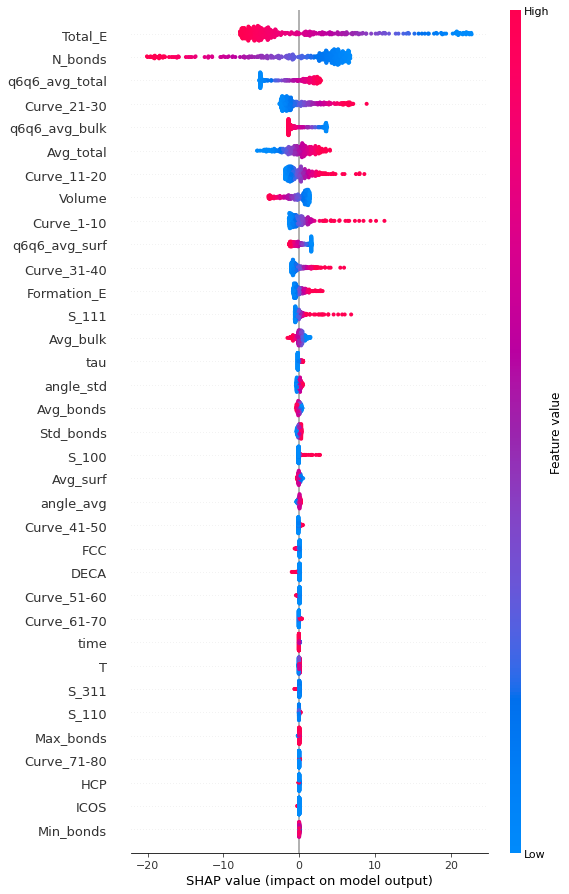

In [63]:
shap.plots.beeswarm(shap_values,max_display=features_num)

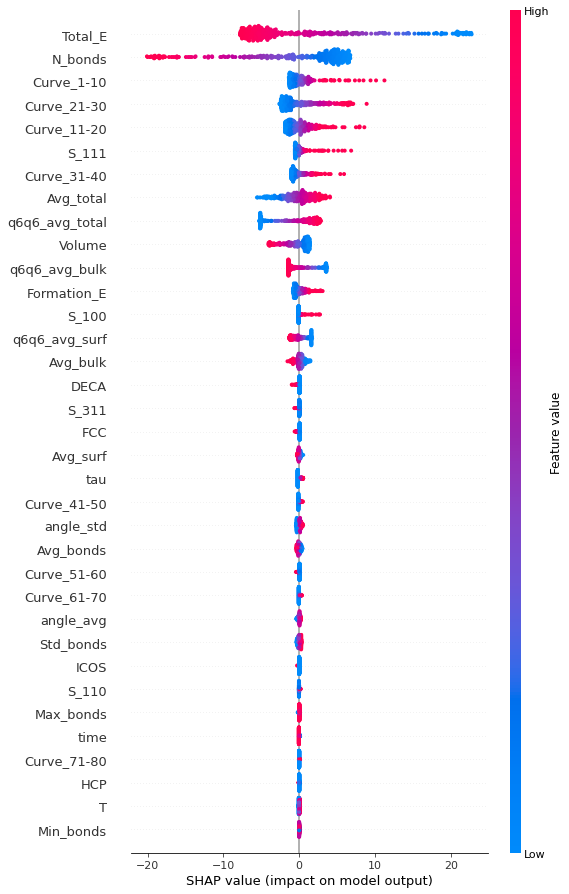

In [64]:
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0), max_display=features_num)


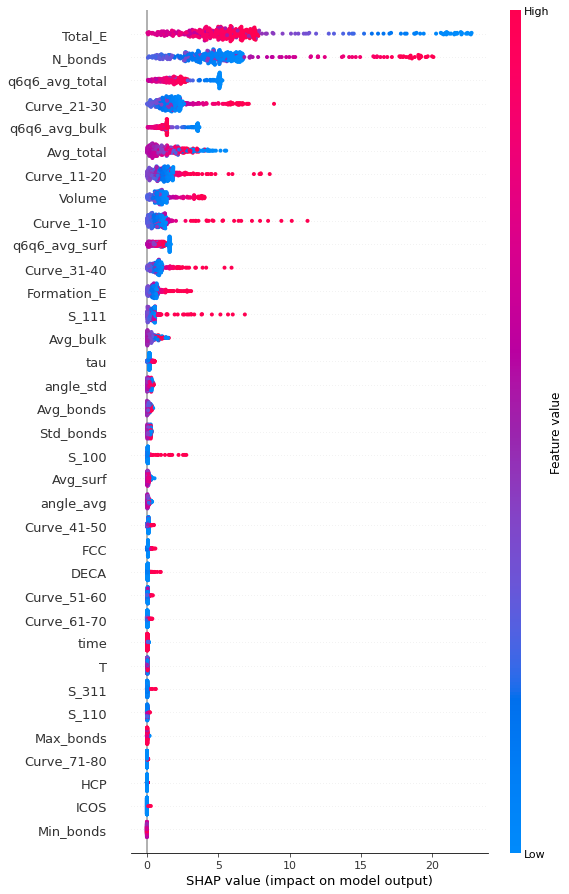

In [65]:
shap.plots.beeswarm(shap_values.abs, max_display=features_num)


In [66]:
shap_values[1]
# .values are SHAP values for all corrosponding features
# base values are the average value i guess E(x)
#data is actual feature values for the sample

.values =
array([-4.02970255e-02, -1.67887770e-01, -2.52388437e-02,  7.95127989e-01,
       -6.72519732e-02,  9.47031758e-01, -8.08919574e-03,  2.19748741e-02,
        1.20946607e+00, -1.84570295e+00, -2.19234582e+00, -6.97631570e-01,
       -1.03613461e-01,  5.76533149e-02, -2.93932661e-02, -3.55054753e-03,
       -1.23014909e-01,  3.08503765e-01, -9.13591172e-02, -4.35523885e+00,
       -4.91542178e-01,  2.45532975e-01, -2.89690201e-01, -1.09894889e-01,
       -2.68327718e-03,  3.87263545e+00,  1.39048701e-01,  4.51385823e-01,
        6.09663076e-03,  5.40114077e-03,  1.82806635e-03,  5.93644499e-02,
        2.42731635e+00, -1.41222325e+00, -1.26129759e+00])

.base_values =
21.216408993280435

.data =
array([7.14285714e-02, 0.00000000e+00, 1.00000000e+00, 1.13025210e-01,
       0.00000000e+00, 1.97670049e-01, 4.89017820e-02, 0.00000000e+00,
       1.98624905e-01, 8.36120401e-04, 4.18027433e-02, 3.75807399e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
   

## Dataframe

In [67]:
#dataset splits as dataframes
df_train = pd.DataFrame(features_train, columns=[ f'feature_{i}' for i in range(35)])
df_validation = pd.DataFrame(features_validation, columns=[ f'feature_{i}' for i in range(35)])
df_test = pd.DataFrame(features_test, columns=[ f'feature_{i}' for i in range(35)])
df_splits_sets =  {'train':df_train,'test':df_test,'val':df_validation}